--- Đã load thành công: D:\project\2015_BOE_Chiu\Subject_01.mat ---
Các keys tìm thấy: ['__header__', '__version__', '__globals__', 'images', 'automaticFluidDME', 'manualFluid1', 'manualFluid2', 'automaticLayersDME', 'automaticLayersNormal', 'manualLayers1', 'manualLayers2']
Kích thước khối ảnh (Image Volume): (496, 768, 61)


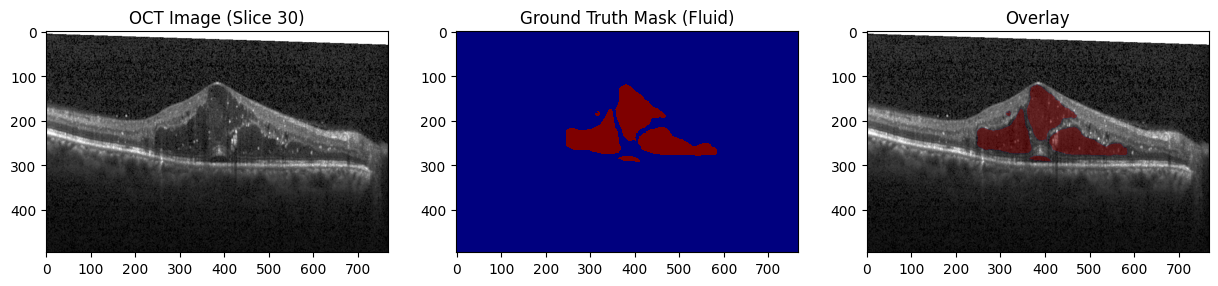

In [2]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

# 1. Cấu hình đường dẫn (Thêm r ở trước để xử lý dấu backslash)
file_path = r"D:\project\2015_BOE_Chiu\Subject_01.mat"

try:
    # 2. Load dữ liệu
    data = scipy.io.loadmat(file_path)
    
    print(f"--- Đã load thành công: {file_path} ---")
    print(f"Các keys tìm thấy: {list(data.keys())}")
    
    # 3. Trích xuất Ảnh & Mask (Dựa trên cấu trúc chuẩn của bộ Chiu 2015)
    # Key chuẩn thường là 'images' và 'manualFluid1' (hoặc 'manualFluid2')
    
    if 'images' in data:
        # Ảnh gốc: shape thường là (Height, Width, Num_Slices)
        img_vol = data['images']
        print(f"Kích thước khối ảnh (Image Volume): {img_vol.shape}")
        
        # Chọn slice ở giữa để hiển thị (thường tổn thương rõ nhất ở giữa)
        mid_slice = img_vol.shape[2] // 2 
        image_2d = img_vol[:, :, mid_slice]
        
        # Xử lý Mask (nếu có)
        if 'manualFluid1' in data:
            mask_vol = data['manualFluid1'] # Lấy nhãn của người gán nhãn 1
            mask_2d = mask_vol[:, :, mid_slice]
            
            # Dữ liệu MATLAB mask thường chứa nan (Not a Number) -> đổi về 0
            mask_2d = np.nan_to_num(mask_2d) 
            # Đảm bảo mask là nhị phân (0 và 1)
            mask_2d = (mask_2d > 0).astype(np.float32)
            
            has_mask = True
        else:
            mask_2d = np.zeros_like(image_2d)
            has_mask = False
            print("Cảnh báo: Không tìm thấy key 'manualFluid1'. Kiểm tra lại danh sách key.")

        # 4. Vẽ biểu đồ
        fig, ax = plt.subplots(1, 3, figsize=(15, 5))
        
        # Ảnh gốc
        ax[0].imshow(image_2d, cmap='gray')
        ax[0].set_title(f"OCT Image (Slice {mid_slice})")
        
        # Mask (Tổn thương)
        ax[1].imshow(mask_2d, cmap='jet', interpolation='nearest')
        ax[1].set_title("Ground Truth Mask (Fluid)")
        
        # Overlay (Chồng ảnh)
        ax[2].imshow(image_2d, cmap='gray')
        # Phủ mask lên: dùng alpha để làm trong suốt
        ax[2].imshow(mask_2d, cmap='jet', alpha=0.5 * (mask_2d > 0)) 
        ax[2].set_title("Overlay")
        
        plt.show()
        
    else:
        print("Lỗi: Không tìm thấy biến 'images' trong file .mat")

except FileNotFoundError:
    print("Lỗi: Không tìm thấy file. Hãy kiểm tra lại đường dẫn.")
except Exception as e:
    print(f"Lỗi không xác định: {e}")